In [1]:
import numpy as np
from turabnet.train import train
from turabnet.nn import NeuralNet
from turabnet.layers import Linear, Tanh, Sigmoid
from turabnet.data import BatchIterator
from turabnet.loss import MSE
from turabnet.optim import SGD
from nn_utils import plot_decision_boundary, plot_loss
import matplotlib.pyplot as plt

### AND Gate

|| Inputs | Outputs   ||
| ---- | ---- |
| X | Y | Z | 1-hot |
| 0 | 0 | 0 | [1 0 ]   |
| 1 | 0 | 0 | [1 0 ]   |
| 0 | 1 | 0 | [1 0 ]   |
| 1 | 1 | 1 | [0 1 ]   |

In [2]:
# Binary
inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

# AND: 1-hot
targets = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1]
])

### Train the model

In [3]:
net = NeuralNet([
        Linear(input_size=2, output_size=2),
        Sigmoid()
    ])

_losses =  train(net=net, inputs=inputs, targets=targets, num_epochs=1000,
                    iterator=BatchIterator(batch_size=32, shuffle=True),
                    loss=MSE(),
                    optimizer=SGD(lr=0.5),
                    verbose=True, print_every=200)

# Testing
_predictions = net.forward(inputs)


print("\n# Lables")
for x, y_pred, y_true in zip(inputs, _predictions, targets):
    print(f"x: {x} y_pred: {np.argmax(y_pred)} y_true: {np.argmax(y_true)}")

epoch:   1 loss: 0.210
epoch: 200 loss: 0.016
epoch: 400 loss: 0.007
epoch: 600 loss: 0.005
epoch: 800 loss: 0.003
epoch: 1000 loss: 0.003

# Lables
x: [0 0] y_pred: 0 y_true: 0
x: [1 0] y_pred: 0 y_true: 0
x: [0 1] y_pred: 0 y_true: 0
x: [1 1] y_pred: 1 y_true: 1


### Try different learning rate

In [4]:
lr = [0.005, 0.05, 0.5]

cache = []
for _lr in lr:
   
    _net = NeuralNet([
        Linear(input_size=2, output_size=2),
        Sigmoid()
    ])

    _losses =  train(net=_net, 
                     inputs=inputs, targets=targets, num_epochs=1000,
                     iterator=BatchIterator(batch_size=32, shuffle=True),
                     loss=MSE(),
                     optimizer=SGD(lr=_lr),
                     verbose=False, print_every=200)

    cache.append((_net, _losses, _lr))
print("end of training")

end of training


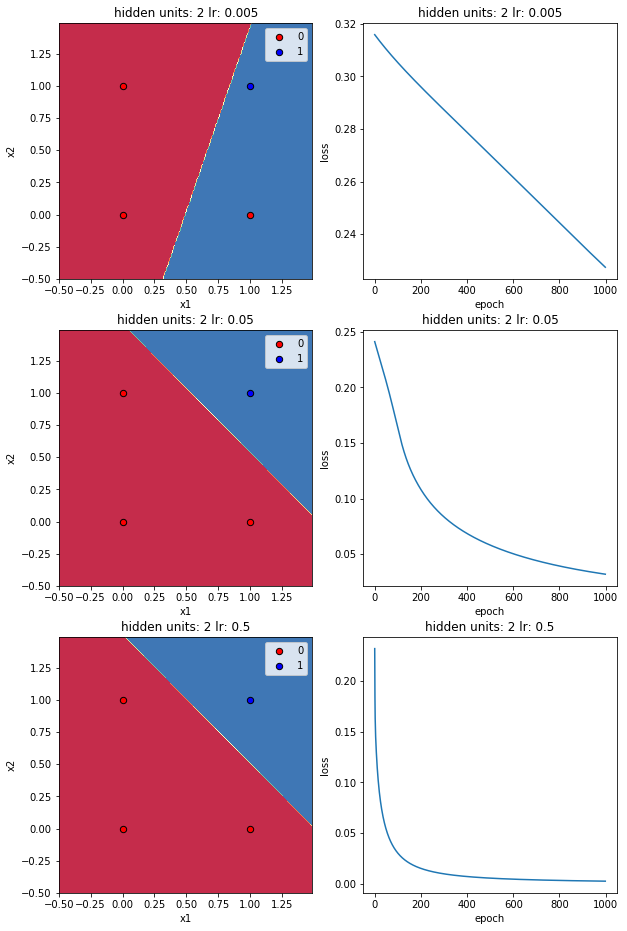

In [5]:
plt.figure(figsize=(10, 16))
for i, (_net, _losses, _lr) in enumerate(cache):
    
    plt.subplot(3,2,2*i+1)
    plot_decision_boundary(inputs, np.argmax(targets, axis=1), lambda x: np.argmax(_net.forward(x), axis=1))
    plt.title(f"hidden units: {2} lr: {_lr}")
    
    plt.subplot(3, 2, 2*i+ 2)
    plot_loss(_losses)
    plt.title(f"hidden units: {2} lr: {_lr}")

plt.show()

### Summary:
- AND outputs are linearly separable. hence we can predict its outputs using just a linear model.
- Sigmoid is used in the outer layer only to squeeze outputs between 0 and 1.
- Even though there are four different states in AND gate, we only need 2 neurons to model it.
- we can see the performance at different learning rate.
- as we used random weights to initialize the parameters, the output will differ at each run time